In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu118'

## Data Preparing & Loading

In [ ]:
# create known parameters
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# splitting data into training and test

# create train/test split

train_split = int(0.8 * len(X))
train_split

40

In [ ]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualizing

In [ ]:
# visualize

def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):
  plt.figure(figsize=(10, 7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Test Data")
  # are there preds?
  if predictions is not None:
    #plot
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

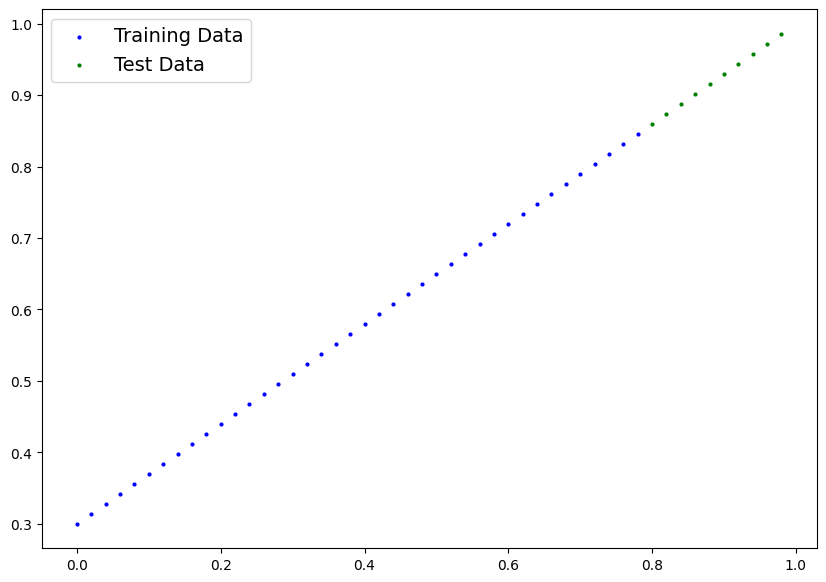

In [ ]:
plot_predictions()

## Building Model

In [ ]:
## build model

# create linear regression model class

class LinearRegressionModel(nn.Module): # almost everything inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                             requires_grad=True, #default
                                             dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  # forward method to define computation
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias



In [ ]:
# checking the contents of pytorch model

# create random seed
torch.manual_seed(42)
model_0 = LinearRegressionModel()

In [ ]:
#check params
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# list named params
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making Predictions

In [ ]:
# making predictions
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

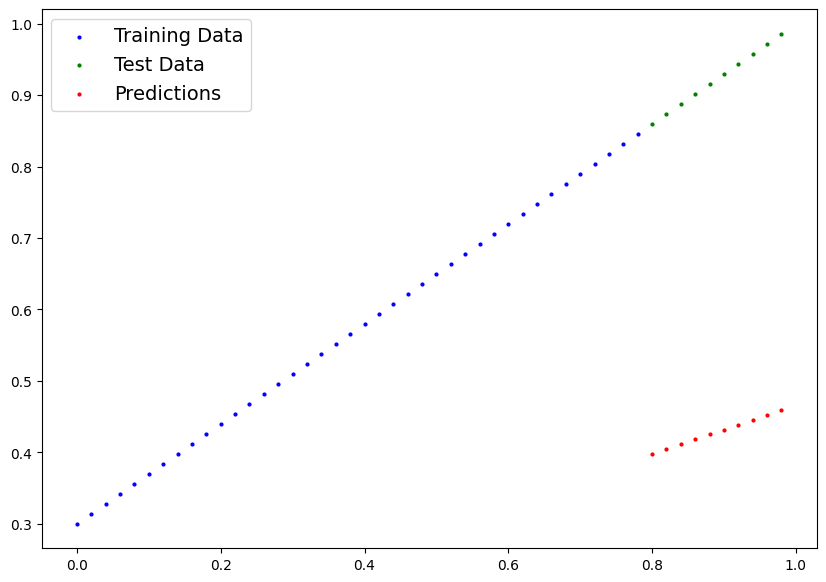

In [ ]:
plot_predictions(predictions=y_preds)

## Training

In [ ]:
# train model

# set upl loss function
loss_fn = nn.L1Loss()

In [ ]:
# set up an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


Training Loop
0. loop through data
1. forward pass - forward propogation
2. calculate loss (compare)
3. optimizer zero grad
4. loss backward - move backwards, calculate grads
5. optimizer step

In [ ]:
# training loop
epochs = 200 # -> 1 loop through data


torch.manual_seed(42)

# track
epoch_count = []
loss_values = []
test_loss_values = []

# 0. loop through data
for epoch in range(epochs):

  # TRAIN LOOP
  #set the model to training mode (default)
  model_0.train()

  # 1. forward pass
  y_pred = model_0(X_train)

  # 2. calculate loss
  loss = loss_fn(y_pred, y_train) #input, target


  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropogation on loss wrt params of model
  loss.backward()

  # 5. step the optimizer (gradient descent)
  optimizer.step() # by default optimizer accumulates through loops so we have to set to zero

  # TEST LOOP
  model_0.eval() #turns of settings not needed
  with torch.inference_mode():  #no tracking of grads etc
    # 1. forward pass
    test_pred = model_0(X_test)

    # 2. calc loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | loss: {loss} | test loss: {test_loss}")
    print(model_0.state_dict())



Epoch: 0 | loss: 0.31288138031959534 | test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | loss: 0.1976713240146637 | test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | loss: 0.08908725529909134 | test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | loss: 0.053148526698350906 | test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | loss: 0.04543796554207802 | test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | loss: 0.04167863354086876 | test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | loss: 0.03818932920694351 | test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

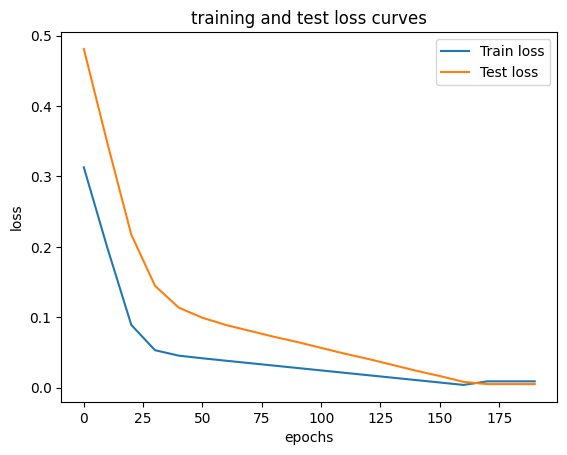

In [ ]:
# plot the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()

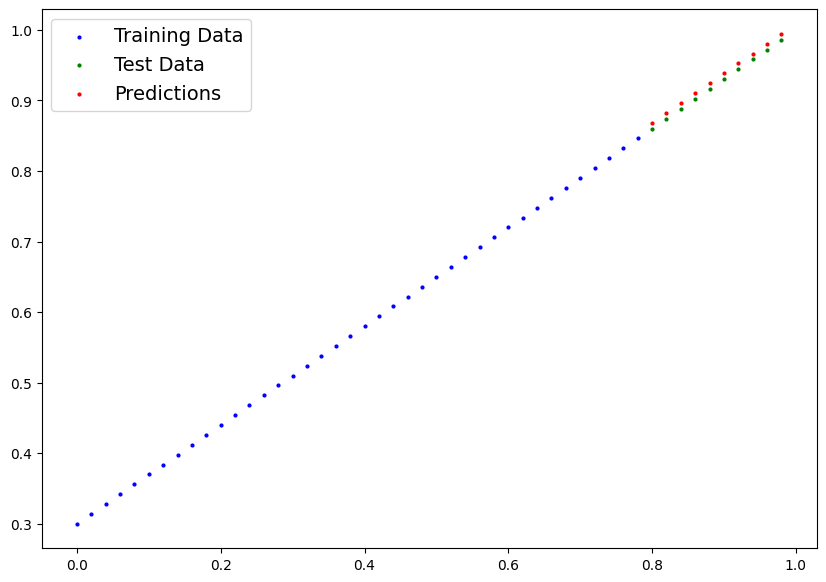

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)


## Saving a model in PyTorch


In [ ]:
# save model
from pathlib import Path

# 1. create model dir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save modules state dict
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [ ]:
# load model
# since we saved only state dict we need to create an instance and assign state dict
loaded_model_0 = LinearRegressionModel()

# load saved state dict
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

In [ ]:
# make pred
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)


In [ ]:
loaded_model_preds == y_preds

## Summary / Pipeline

In [ ]:
# visualize

def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):
  plt.figure(figsize=(10, 7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Test Data")
  # are there preds?
  if predictions is not None:
    #plot
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu118'

In [ ]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

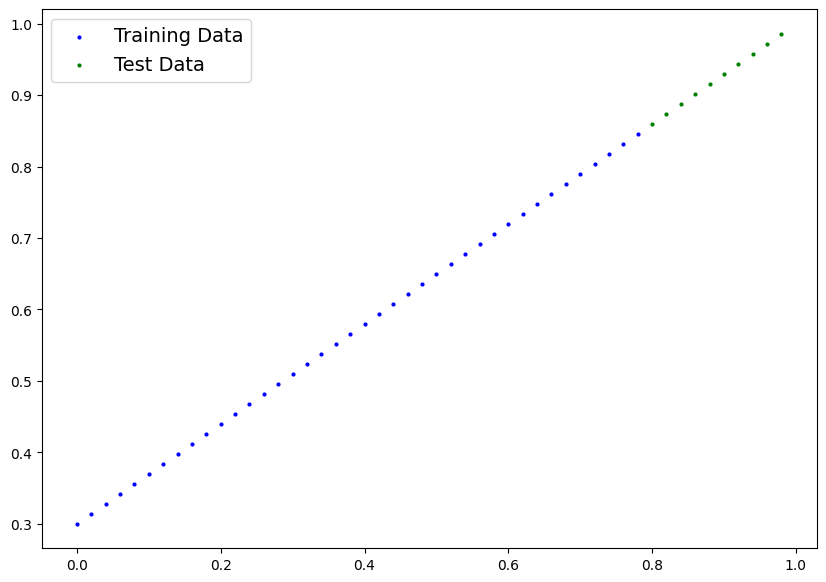

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.linear
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01 )


In [ ]:
torch.manual_seed(42)

epochs = 200

#put data too
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #test
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} ~ loss {loss} ~ test loss {test_loss}")

Epoch: 0 ~ loss 0.5551779866218567 ~ test loss 0.5739762187004089
Epoch: 10 ~ loss 0.439968079328537 ~ test loss 0.4392664134502411
Epoch: 20 ~ loss 0.3247582018375397 ~ test loss 0.30455657839775085
Epoch: 30 ~ loss 0.20954833924770355 ~ test loss 0.16984669864177704
Epoch: 40 ~ loss 0.09433845430612564 ~ test loss 0.03513690456748009
Epoch: 50 ~ loss 0.023886388167738914 ~ test loss 0.04784907028079033
Epoch: 60 ~ loss 0.019956795498728752 ~ test loss 0.045803118497133255
Epoch: 70 ~ loss 0.016517987474799156 ~ test loss 0.037530567497015
Epoch: 80 ~ loss 0.013089174404740334 ~ test loss 0.02994490973651409
Epoch: 90 ~ loss 0.009653178043663502 ~ test loss 0.02167237363755703
Epoch: 100 ~ loss 0.006215683650225401 ~ test loss 0.014086711220443249
Epoch: 110 ~ loss 0.00278724217787385 ~ test loss 0.005814164876937866
Epoch: 120 ~ loss 0.0012645035749301314 ~ test loss 0.013801801018416882
Epoch: 130 ~ loss 0.0012645035749301314 ~ test loss 0.013801801018416882
Epoch: 140 ~ loss 0.0012

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

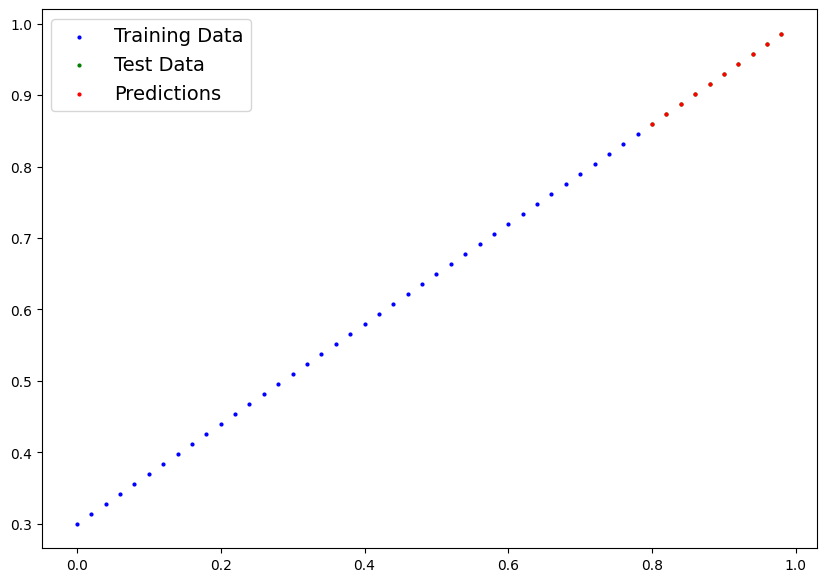

In [ ]:
plot_predictions(predictions=y_preds.cpu())

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok="True")

MODEL_NAME = "01_pytorch_worflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])